In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import re
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
colnames=['id','entity','sentiment','Content'] 
df=pd.read_csv('twitter_training.csv', names=colnames, low_memory=False, header=None)
df.head()

,id,entity,sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
df.shape

(74682, 4)

In [4]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   Content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


# Preprocessing Stage 1

In [5]:
#conevrt all text into lower case
def text_lowercase(text):
    if pd.isnull(text)==False:
            text=text.lower()
    return text

df['Content']=np.vectorize(text_lowercase)(df['Content'])
df.tail()

,id,entity,sentiment,Content
74677,9200,Nvidia,Positive,just realized that the windows partition of my...
74678,9200,Nvidia,Positive,just realized that my mac window partition is ...
74679,9200,Nvidia,Positive,just realized the windows partition of my mac ...
74680,9200,Nvidia,Positive,just realized between the windows partition of...
74681,9200,Nvidia,Positive,just like the windows partition of my mac is l...


In [6]:
#remove patterns in the input text

def remove_pattern(input_txt,pattern):
    if pd.isnull(input_txt)==True:
        return input_txt
    r=re.findall(pattern, input_txt)
    #print(r)
    for word in r:
        input_txt=re.sub(word,"",input_txt)
    #print(input_txt)
    return input_txt

df['NewContent']=np.vectorize(remove_pattern)(df['Content'],"@[\w]*|@[][\w]*")

In [7]:
#df['NewContent']=df['NewContent'].str.replace("http:[a=zA-Z0-9/\#$.]*"," ")
#pattern='^\w+([:@#$\/\.-]*\w+)*(\.\w{2,3})+$'
#df['replaceLink']=np.vectorize(remove_pattern)(df['Content'],pattern)
#df.head()

In [8]:
# remove punctuation, special character and numbers

df['NewContent']=df['NewContent'].str.replace("[^a-zA-Z#]"," ")
df

,id,entity,sentiment,Content,NewContent
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,i am coming to the borders and i will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder ...
...,...,...,...,...,...
74677,9200,Nvidia,Positive,just realized that the windows partition of my...,just realized that the windows partition of my...
74678,9200,Nvidia,Positive,just realized that my mac window partition is ...,just realized that my mac window partition is ...
74679,9200,Nvidia,Positive,just realized the windows partition of my mac ...,just realized the windows partition of my mac ...
74680,9200,Nvidia,Positive,just realized between the windows partition of...,just realized between the windows partition of...


In [9]:
# remove whitespace from text
def remove_whitespace(text):
    if pd.isnull(text)==False:
        return  " ".join(text.split())
    else:
        return text
df['NewContent']=np.vectorize(remove_whitespace)(df['NewContent'])
df.tail() 

,id,entity,sentiment,Content,NewContent
74677,9200,Nvidia,Positive,just realized that the windows partition of my...,just realized that the windows partition of my...
74678,9200,Nvidia,Positive,just realized that my mac window partition is ...,just realized that my mac window partition is ...
74679,9200,Nvidia,Positive,just realized the windows partition of my mac ...,just realized the windows partition of my mac ...
74680,9200,Nvidia,Positive,just realized between the windows partition of...,just realized between the windows partition of...
74681,9200,Nvidia,Positive,just like the windows partition of my mac is l...,just like the windows partition of my mac is l...


In [10]:
#tokenization of tweets
tokenized_tweets= df['NewContent'].apply( lambda x: x.split())
tokenized_tweets.head()
print(type(tokenized_tweets))
print(type(df['NewContent']))
#df['NewContent']=tokenized_tweets

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [11]:
#removal of stopwords
import nltk
nltk.download('stopwords')
from spacy.lang.en import stop_words as stop_words1

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
from nltk.corpus import stopwords
type(tokenized_tweets)
stop_words2= stop_words1.STOP_WORDS


def remove_stopwords(text):
    l=[]
    for word in text:
        if word not in stop_words2 and len(word)>2:
            l.append(word)
    return l

tokenized_tweet=tokenized_tweets.apply(remove_stopwords)

In [13]:
from nltk.stem.porter import PorterStemmer

In [14]:
stemmer=PorterStemmer()
tokenizedTweet=tokenized_tweet.apply( lambda sentence: [stemmer.stem(word) for word in sentence])
tokenizedTweet.head()

0     [get, borderland, murder]
1          [come, border, kill]
2       [get, borderland, kill]
3    [come, borderland, murder]
4     [get, borderland, murder]
Name: NewContent, dtype: object

In [15]:
#combine words into sentence
for i in range(0,len(tokenizedTweet)):
    tokenizedTweet[i]=" ".join(tokenizedTweet[i])
tokenizedTweet.head()
df['Content']=tokenizedTweet

# EDA

In [18]:
#!pip install wordcloud

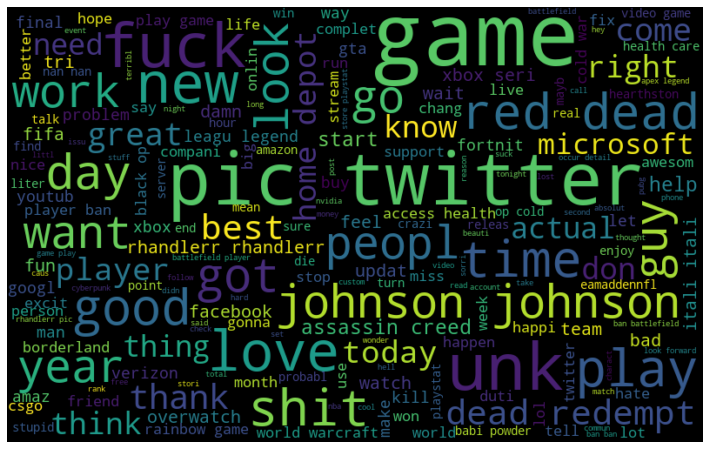

In [16]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['Content']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

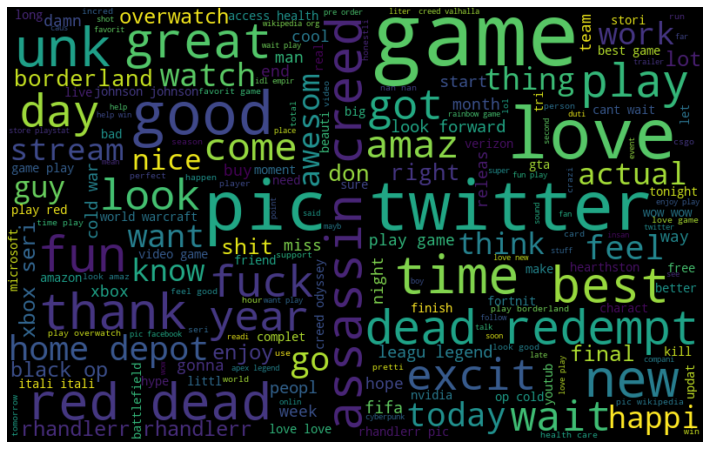

In [17]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['Content'][df['sentiment']=='Positive']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

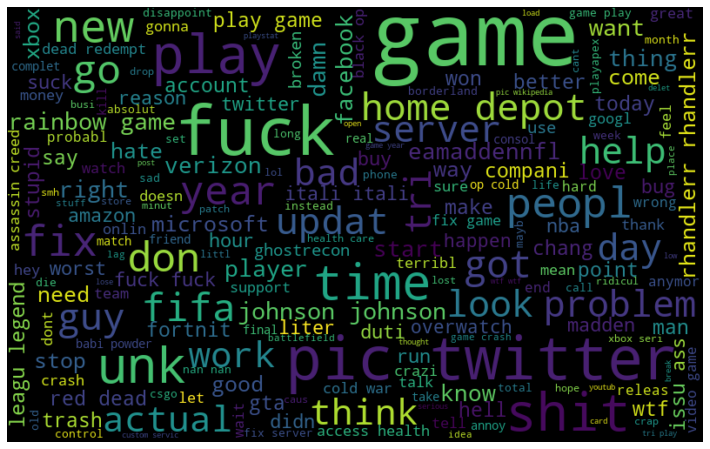

In [18]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['Content'][df['sentiment']=='Negative']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot:>

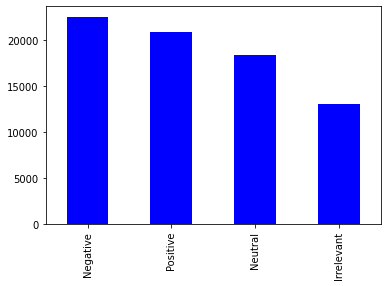

In [21]:
df['sentiment'].value_counts().plot.bar(color = 'blue', figsize = (6, 4))

In [20]:
pos_count=0
neg_count=0
neu_count=0

for i in df['sentiment']:
    if i=='Positive':
        pos_count+=1
    elif i=='Negative':
        neg_count+=1
    elif i=='Neutral':
        neu_count+=1

print(pos_count, neg_count, neu_count)

20832 22542 18318


# Vectorization

In [22]:
# Import Tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer() 
vectors = vectorizer.fit_transform(tokenizedTweet)

In [23]:
print("n_samples: %d, n_features: %d" % vectors.shape)

n_samples: 74682, n_features: 21782


# Model Training

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, f1_score

In [25]:
X=df['Content']
Y=df['sentiment']
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=0, shuffle=True, stratify=None)

In [26]:
#Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [27]:
categories=model.predict(X_test)

In [28]:
accuracy_score(y_test,categories)

0.7045591484233782

In [29]:
X=vectors
Y=df['sentiment']
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=0, shuffle=True, stratify=None)

In [30]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
scikit_log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
scikit_log_reg.fit(X_train,y_train)

[LibLinear]

LogisticRegression(C=5, max_iter=1000, random_state=0, solver='liblinear',
                   verbose=1)

In [31]:
categories=scikit_log_reg.predict(X_test)

In [32]:
accuracy_score(y_test,categories)

0.7974158130816095

In [34]:
#KNN
#for n=7 it gives 87 accuracy, greater than 7, accuracy decreases
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
clf = knn.fit(X_train,y_train)

In [35]:
categories=knn.predict(X_test)

In [36]:
accuracy_score(y_test,categories)

0.8752761598714601

In [37]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5,50,100],
    'max_depth': [2,10,20,None]
}

cv = GridSearchCV(rf,parameters)
cv.fit(X_train,y_train.values.ravel())

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 10, 20, None],
                         'n_estimators': [5, 50, 100]})

In [65]:
cv.best_params_

{'max_depth': None, 'n_estimators': 100}

In [66]:
rf_final=RandomForestClassifier()


In [67]:
rf_final.fit(X_train,y_train)

RandomForestClassifier()

In [70]:
categories=rf_final.predict(X_test)
accuracy_score(y_test,categories)

0.8981723237597912

In [39]:
categories=cv.predict(X_test)
accuracy_score(y_test,categories)

0.896632523264377

In [40]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(criterion="entropy",max_depth=75)
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=75)

In [41]:
categories=decisiontree.predict(X_test)
accuracy_score(y_test,categories)

0.6649929704759991

In [42]:
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.303
Accuracy score (validation): 0.300
Learning rate:  0.075
Accuracy score (training): 0.311
Accuracy score (validation): 0.308
Learning rate:  0.1
Accuracy score (training): 0.312
Accuracy score (validation): 0.309
Learning rate:  0.25
Accuracy score (training): 0.318
Accuracy score (validation): 0.314
Learning rate:  0.5
Accuracy score (training): 0.318
Accuracy score (validation): 0.314
Learning rate:  0.75
Accuracy score (training): 0.318
Accuracy score (validation): 0.314
Learning rate:  1
Accuracy score (training): 0.318
Accuracy score (validation): 0.314


In [71]:
#SVM
from sklearn.svm import SVC


In [ ]:
model=SVC(kernel='linear',C=1E10)
model.fit(X_train,y_train)

In [25]:
categories=model.predict(X_test)

1519669                                         thx like pic
1245284                         http twitpic com wore better
1299040    work think switch garag excit plan fairi light...
200654                     hmm sure know fill ticket complet
699963                              sorri lot peac heal vibe
                                 ...                        
152315                       love zune hate lack canada love
963395     sound like blast safe flight hope rest imagin ...
117952                 feel bad zine need send eep goe sorri
1484405               finish dust moonlight week glad sequel
305711                             want real level geek cred
Name: Content, Length: 1280000, dtype: object


In [57]:
!pip install externals

ERROR: Could not find a version that satisfies the requirement externals (from versions: none)
ERROR: No matching distribution found for externals


In [58]:
import joblib

In [59]:
filename="model.joblib"
joblib.dump(cv, filename)

['model.joblib']

In [61]:
filename="vectorizer.joblib"
joblib.dump(vectorizer,filename)

['vectorizer.joblib']

In [71]:
filename="Model_rf.joblib"
joblib.dump(rf_final, filename)

['Model_rf.joblib']